In [8]:
from stable_baselines3 import DDPG,TD3,PPO
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor


from stable_baselines3.common.noise import (
    NormalActionNoise,
    OrnsteinUhlenbeckActionNoise,
)
from safegym.envs import Satellite_SE2
import gymnasium as gym
from gymnasium.wrappers.time_limit import TimeLimit
import numpy as np
import os
import numpy as np
from matplotlib import pyplot as plt
import time

In [9]:
from moviepy.editor import ImageSequenceClip
from tqdm import tqdm
def run_episode(
    model, env, model_name="PPO", **kargs
):
    term = False
    obs, info = env.reset()
    frames = [env.render()]
    counter = 0
    for i in tqdm(range(20_000)):
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, term, trunc, info = env.step(action)
        counter += 1
        if counter % 100 == 0:
            frames.append(env.render())
        if term or trunc:
            X = np.array(env.render(), dtype=np.uint8)
            plt.imshow(X)
            term = False
            break
    env.close()
    ImageSequenceClip(frames, fps=30).write_videofile(f"{model_name}.mp4")
    

In [10]:
def env_maker(render_mode=None):
    env = gym.make(
        "Satellite-SE2-v0",
        render_mode=render_mode,
        step=np.float32(0.1),
    )

    env = TimeLimit(env, max_episode_steps=20_000)
    env = Monitor(env)

    return env

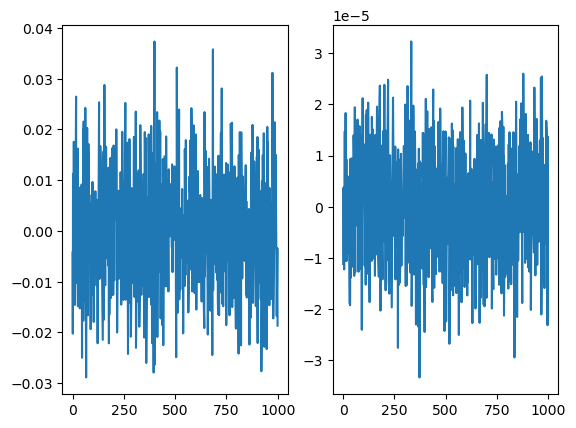

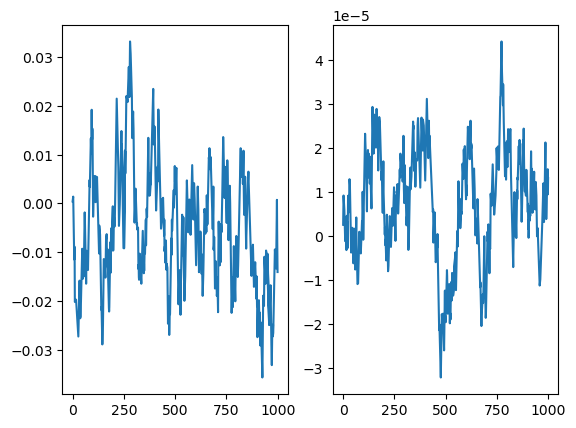

In [26]:
from stable_baselines3.common.noise import NormalActionNoise, OrnsteinUhlenbeckActionNoise
%matplotlib notebook
import numpy as np

n_actions=2
params = {
    "mean": np.zeros(n_actions),
    "sigma": np.array([0.01, 0.00001], dtype=np.float32),  # np.ones(n_actions
    "dtype": np.float32,
}
O_params = {
    "theta": 0.2,
    "dt": 1e-1,
    "initial_noise": None,
}
action_noise = NormalActionNoise(**params)
o_action_noise = OrnsteinUhlenbeckActionNoise(**params, **O_params)
noises=[]
for _ in range(1000):
  noises.append(action_noise())
%matplotlib inline

from matplotlib import pyplot
noises=np.array(noises)
fig,axs= pyplot.subplots(1,n_actions)
for i in range(n_actions):
  axs[i].plot(noises[:,i])

noises=[]
for _ in range(1000):
  noises.append(o_action_noise())
%matplotlib inline


from matplotlib import pyplot
noises=np.array(noises)
fig,axs=pyplot.subplots(1,n_actions)
for i in range(n_actions):
  axs[i].plot(noises[:,i])




In [12]:
env_name = "Satellite-SE2-v0"
Algo_name = "TD3"
date = "10_09_11_10"
last_model = "2"


models_dir = "/run/media/simone/Shared/Documenti/Magistrale/Tesi/Code/Python/Test_env/savings/" 
models_dir+= f"{env_name}/{Algo_name}/{date}/models"
model_position=f"{models_dir}/{Algo_name}_{last_model}"
# print(str(model_position))

# model_position= "/run/media/simone/Shared/Documenti/Magistrale/Tesi/Code/Python/Test_env/savings/Satellite-SE2-v0/TD3/10_08_20_15/models/TD3_1"
# print(model_position)
model=TD3.load(str(model_position))
env=env_maker(render_mode="rgb_array")
run_episode(model, env_maker(render_mode="rgb_array"))

 36%|███▌      | 7224/20000 [00:11<00:21, 603.67it/s]


[-1.5378118e-03  6.7352882e-04  9.6885264e-01 -2.4763796e-01
  1.0000000e+00  0.0000000e+00 -2.5471419e-04 -1.5745155e-04
 -1.0001348e+00  0.0000000e+00]
Moviepy - Building video PPO.mp4.
Moviepy - Writing video PPO.mp4



Moviepy - Done !
Moviepy - video ready PPO.mp4
